In [ ]:
# Letter Classification 
# 
#Be sure to download the OCR_file for data
#https://drive.google.com/file/d/1YV7VDUC2ot_nzc6vYql4fz_cRoBe1QG2/view?usp=sharing
#
#

#Link for Dataset
[OCR DATA](https://drive.google.com/file/d/1YV7VDUC2ot_nzc6vYql4fz_cRoBe1QG2/view?usp=sharing)

# Binary Image Classification
Data! Great, well, what kind of data?


## Import libraries, libraries galore

In [ ]:
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB



# Data Visualization

Archive:  ocr_data.zip
  inflating: ocr10-test.txt          
  inflating: ocr10-train.txt         
ocr10-test.txt	ocr10-train.txt  ocr_data.zip  sample_data


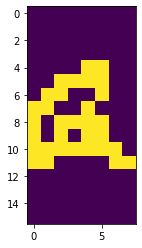

In [ ]:
! unzip ocr_data.zip
! ls

ocr_test = pd.read_table('ocr10-test.txt', sep=',')
ocr_train = pd.read_table('ocr10-train.txt', sep=',')

#Brought the two .txt files into the playing field
#No benchwarmers over here 
#5 rows x 129 col
#Features are numbered from int '0' to remaining floats '0.111'
#ie 0, 0.1, 0.2,...


train_features = ocr_train.columns[:-1]
test_features = ocr_test.columns[:-1]
#because the last row is the target column
#make it so

train_target = ocr_train.columns[-1]
test_target = ocr_test.columns[-1]

#convert to numpy for visuals
ocr_train_np=ocr_train[train_features].to_numpy()
ocr_test_np=ocr_test[test_features].to_numpy()

#toprint
 
# reshape because the original images are 16x8
letter = ocr_train_np[0,:].reshape(16,8)
plt.imshow(letter)

# MultiNominal Naive Bayes Model

In [ ]:
#lets train naive bayes model
#MulitNominal Model
from sklearn.naive_bayes import MultinomialNB

# assign the training and test data to variables
features = ocr_train[train_features]
target = ocr_train[train_target]

features_test = ocr_test[test_features]
target_test=ocr_test[test_target]

# fit the multinomial Naive Bayes model
mnm = MultinomialNB(alpha=1.0, fit_prior=True)
mnm.fit(features, target)

# predict outcome for the test data
prediction = mnm.predict(features_test)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)


# Confusion Matrix

Confusion matrix is a matrix that allows you to visualize the performance of the classification machine learning models. With this visualization, you can get a better idea of how your machine learning model is performing.

In [ ]:

t_features=ocr_test[test_features]
t_target = ocr_test[test_target]
t_target = t_target.to_numpy()


cMatrix = confusion_matrix(t_target, prediction, labels=range(10))
print(cMatrix)


[[1163    2   29   33   61    3   33   17    1    2]
 [  10  295    0   14   12    3    6   59   28    1]
 [ 129    7  450    6   91    5   15    1    1    0]
 [  54    6    4  334   16    2    7    2   40   16]
 [ 378   17  109    6 1025   69   46    2    0    0]
 [   9    4    8   13   29  202    2    8   32    0]
 [  70   17    4   76   40   18  567    6   26    0]
 [  11   46    1   12    4    0    3  185   25    0]
 [  15   21   12   90    6   70   20   35 1311   58]
 [   1    2    0    6    1    0    7    0   16   30]]


# Display Confusion Matrix as an image 

matplotlib.pyplot.imshow, the input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image.

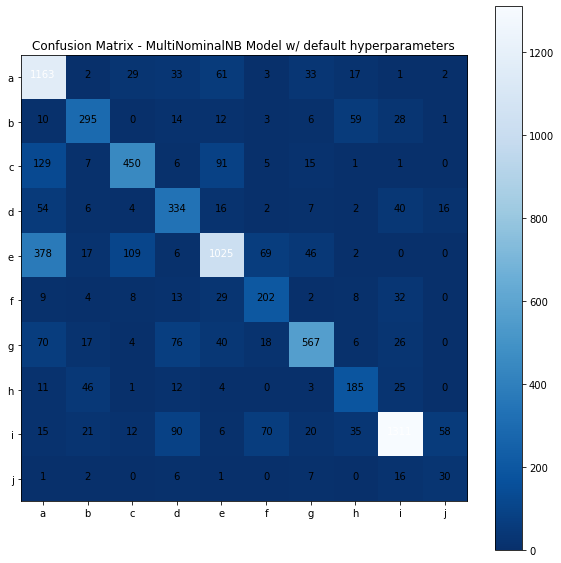

In [ ]:
classes = ['a','b','c','d','e','f','g','h','i','j']

plt.figure(figsize=(10,10))

plt.imshow(cMatrix, interpolation='nearest', cmap=plt.cm.Blues_r)
plt.title('Confusion Matrix - MultiNominalNB Model w/ default hyperparameters')
plt.colorbar()
plt.xticks(range(10),classes)
plt.yticks(range(10),classes)

for k,v in itertools.product(range(cMatrix.shape[0]),range(cMatrix.shape[1])):
  plt.text(v, k, cMatrix[k,v],horizontalalignment="center",color="white" if cMatrix[k,v]>800 else "black")

plt.show()

# Precision recall fscore support 

In [ ]:

y_true = np.array(t_target)
y_pred = np.array(prediction)


precision_recall_fscore_support(y_true, y_pred, average='macro')

precision_recall_fscore_support(y_true, y_pred, average='micro')

precision_recall_fscore_support(y_true, y_pred, average='weighted')

(0.7403475582473816, 0.7196273774097555, 0.7223662318201954, None)

# Classification Report

Precision, recall, f1-score and support all in one report

In [ ]:
print("MultiNominalNB Classification Report w/ default hyperparameters")
print(classification_report(y_true, y_pred, target_names=classes))

MultiNominalNB Classification Report w/ default hyperparameters
              precision    recall  f1-score   support

           a       0.63      0.87      0.73      1344
           b       0.71      0.69      0.70       428
           c       0.73      0.64      0.68       705
           d       0.57      0.69      0.62       481
           e       0.80      0.62      0.70      1652
           f       0.54      0.66      0.59       307
           g       0.80      0.69      0.74       824
           h       0.59      0.64      0.61       287
           i       0.89      0.80      0.84      1638
           j       0.28      0.48      0.35        63

    accuracy                           0.72      7729
   macro avg       0.65      0.68      0.66      7729
weighted avg       0.74      0.72      0.72      7729



Hmm, we'll work on the hyper parameters shortly. Let's run the ROC. Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality. ROC curves are typically used in binary classification to study the output of a classifier. Get it? Got it? alright, here we go. 

# Receiver Operating Characteristic (ROC)

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. Let's create a ROC curve with *our* selected binary clasifier system.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now mis

Text(0.5, 0, 'False Positive Rate')

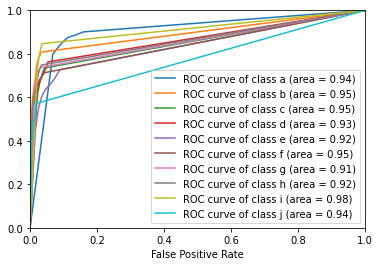

In [ ]:
#The ROC curve is created by plotting the true positive rate (TPR) against the 
#false positive rate (FPR) at various threshold settings. The true-positive rate
# is also known as sensitivity, recall or probability of detection.


lw = 2
plt.figure()


#range represents classes a-j
for rocClass in range(10):
  predict_prob = mnm.predict_proba(features_test)
  prob_possibility = predict_prob[:, rocClass]
  thresholds = np.arange(0.0, 1.2, 0.1) #just as range gives a range of numbers and its skip patter so does numpy arange
  true_pos, false_pos = [0] * len(thresholds), [0] * len(thresholds)
  for pred, y in zip(prob_possibility, target_test):
    for i, threshold in enumerate(thresholds):
      if pred >= threshold:
        if y == rocClass:
          true_pos[i] += 1
        else:
          false_pos[i] += 1
      else:
        break
  true_pos_rate = [tp/len(np.where(target_test == rocClass)[0]) for tp in true_pos]
  false_pos_rate = [fp/len(np.where(target_test != rocClass)[0]) for fp in false_pos]
  roc_score = roc_auc_score(target_test == rocClass, prob_possibility, max_fpr=1)
  plt.plot(false_pos_rate, true_pos_rate, label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[rocClass], roc_score))
  plt.legend(loc="lower right")
  plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')


# Hyper Parameters with GridSearchCV

In [ ]:
#defining parameter range
#parameter grid takes a dictionary containing list of 
#values of each hyperparameter

param_grid = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1]} 
grid = GridSearchCV(mnm, param_grid, refit = True, verbose = 3)


# fitting the model for grid search
grid.fit(features, target)


# print best parameter after tuning
print(grid.best_params_)


# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


#testing the model
grid_predictions = grid.predict(features_test)
print(classification_report(target_test, grid_predictions))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END .........................alpha=0.1;, score=0.706 total time=   0.1s
[CV 2/5] END .........................alpha=0.1;, score=0.698 total time=   0.1s
[CV 3/5] END .........................alpha=0.1;, score=0.732 total time=   0.1s
[CV 4/5] END .........................alpha=0.1;, score=0.731 total time=   0.1s
[CV 5/5] END .........................alpha=0.1;, score=0.729 total time=   0.1s
[CV 1/5] END .........................alpha=0.2;, score=0.706 total time=   0.1s
[CV 2/5] END .........................alpha=0.2;, score=0.698 total time=   0.1s
[CV 3/5] END .........................alpha=0.2;, score=0.732 total time=   0.1s
[CV 4/5] END .........................alpha=0.2;, score=0.731 total time=   0.1s
[CV 5/5] END .........................alpha=0.2;, score=0.729 total time=   0.1s
[CV 1/5] END .........................alpha=0.3;, score=0.706 total time=   0.1s
[CV 2/5] END .........................alpha=0.3;

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)


We found the best alpha hyper parameter!! alpha 0.8!! lets plug

# Re-train with optimal hyper parameters

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)


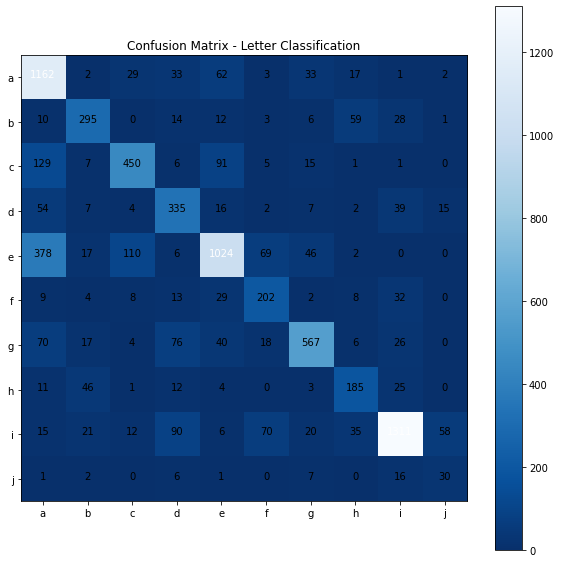

              precision    recall  f1-score   support

           a       0.63      0.86      0.73      1344
           b       0.71      0.69      0.70       428
           c       0.73      0.64      0.68       705
           d       0.57      0.70      0.62       481
           e       0.80      0.62      0.70      1652
           f       0.54      0.66      0.59       307
           g       0.80      0.69      0.74       824
           h       0.59      0.64      0.61       287
           i       0.89      0.80      0.84      1638
           j       0.28      0.48      0.36        63

    accuracy                           0.72      7729
   macro avg       0.65      0.68      0.66      7729
weighted avg       0.74      0.72      0.72      7729



In [ ]:
#Re train with hyper parameters

features = ocr_train[train_features]
target = ocr_train[train_target]

features_test = ocr_test[test_features]
target_test=ocr_test[test_target]

#alpha = 0.8
mnm = MultinomialNB(alpha=0.8, fit_prior=True)
mnm.fit(features, target)

prediction = mnm.predict(features_test)


#confusion matrix
t_features=ocr_test[test_features]
t_target = ocr_test[test_target]
t_target = t_target.to_numpy()


cMatrix = confusion_matrix(t_target, prediction, labels=range(10))


#Functions creating iterators for efficient looping - itertools
classes = ['a','b','c','d','e','f','g','h','i','j']

plt.figure(figsize=(10,10))

plt.imshow(cMatrix, interpolation='nearest', cmap=plt.cm.Blues_r)
plt.title('Confusion Matrix - Letter Classification')
plt.colorbar()
plt.xticks(range(10),classes)
plt.yticks(range(10),classes)

for k,v in itertools.product(range(cMatrix.shape[0]),range(cMatrix.shape[1])):
  plt.text(v, k, cMatrix[k,v],horizontalalignment="center",color="white" if cMatrix[k,v]>800 else "black")

plt.show()

#New scores
y_true = np.array(t_target)
y_pred = np.array(prediction)


print(classification_report(y_true, y_pred, target_names=classes))


# New Model ??


Hyper parameters updated yet no changes made. Let's try another model, the --ComplimentNB-- CategoricalNB. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)


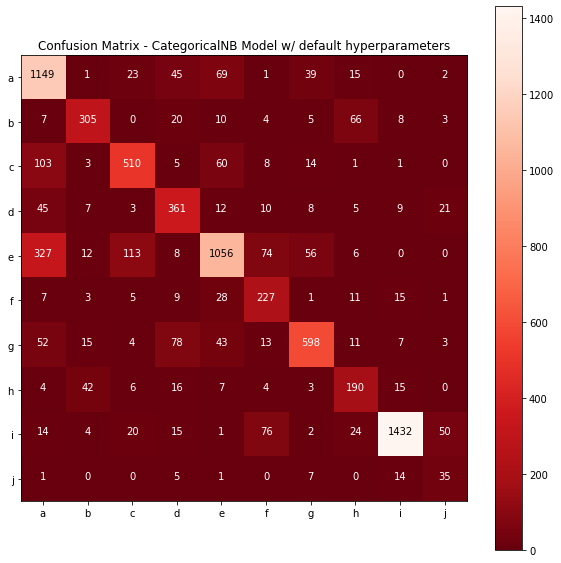

CategoricalNB Classification Report w/ default hyperparameters
              precision    recall  f1-score   support

           a       0.67      0.85      0.75      1344
           b       0.78      0.71      0.74       428
           c       0.75      0.72      0.73       705
           d       0.64      0.75      0.69       481
           e       0.82      0.64      0.72      1652
           f       0.54      0.74      0.63       307
           g       0.82      0.73      0.77       824
           h       0.58      0.66      0.62       287
           i       0.95      0.87      0.91      1638
           j       0.30      0.56      0.39        63

    accuracy                           0.76      7729
   macro avg       0.69      0.72      0.70      7729
weighted avg       0.78      0.76      0.76      7729



In [ ]:

#Re train with hyper parameters

features = ocr_train[train_features]
target = ocr_train[train_target]

features_test = ocr_test[test_features]
target_test=ocr_test[test_target]

#ComplimentNB model
canb = CategoricalNB(alpha=1.0, fit_prior=True)
canb.fit(features, target)

prediction = canb.predict(features_test)


#confusion matrix
t_features=ocr_test[test_features]
t_target = ocr_test[test_target]
t_target = t_target.to_numpy()


cMatrix = confusion_matrix(t_target, prediction, labels=range(10))


#Functions creating iterators for efficient looping - itertools
classes = ['a','b','c','d','e','f','g','h','i','j']

plt.figure(figsize=(10,10))

plt.imshow(cMatrix, interpolation='nearest', cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix - CategoricalNB Model w/ default hyperparameters')
plt.colorbar()
plt.xticks(range(10),classes)
plt.yticks(range(10),classes)

for k,v in itertools.product(range(cMatrix.shape[0]),range(cMatrix.shape[1])):
  plt.text(v, k, cMatrix[k,v],horizontalalignment="center",color="black" if cMatrix[k,v]>800 else "white")

plt.show()

#New scores
y_true = np.array(t_target)
y_pred = np.array(prediction)

print("CategoricalNB Classification Report w/ default hyperparameters")
print(classification_report(y_true, y_pred, target_names=classes))

In [ ]:
#defining parameter range
#parameter grid takes a dictionary containing list of 
#values of each hyperparameter

param_grid = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1]} 
grid = GridSearchCV(canb, param_grid, refit = True, verbose = 3)


# fitting the model for grid search
grid.fit(features, target)


# print best parameter after tuning
print(grid.best_params_)


# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


#testing the model
grid_predictions = grid.predict(features_test)
print(classification_report(target_test, grid_predictions))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END .........................alpha=0.1;, score=0.745 total time=   0.1s
[CV 2/5] END .........................alpha=0.1;, score=0.737 total time=   0.1s
[CV 3/5] END .........................alpha=0.1;, score=0.767 total time=   0.1s
[CV 4/5] END .........................alpha=0.1;, score=0.765 total time=   0.1s
[CV 5/5] END .........................alpha=0.1;, score=0.765 total time=   0.1s
[CV 1/5] END .........................alpha=0.2;, score=0.745 total time=   0.1s
[CV 2/5] END .........................alpha=0.2;, score=0.737 total time=   0.1s
[CV 3/5] END .........................alpha=0.2;, score=0.766 total time=   0.1s
[CV 4/5] END .........................alpha=0.2;, score=0.765 total time=   0.2s
[CV 5/5] END .........................alpha=0.2;, score=0.766 total time=   0.1s
[CV 1/5] END .........................alpha=0.3;, score=0.745 total time=   0.1s
[CV 2/5] END .........................alpha=0.3;

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)


# New model new hyper parameters... right?

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)


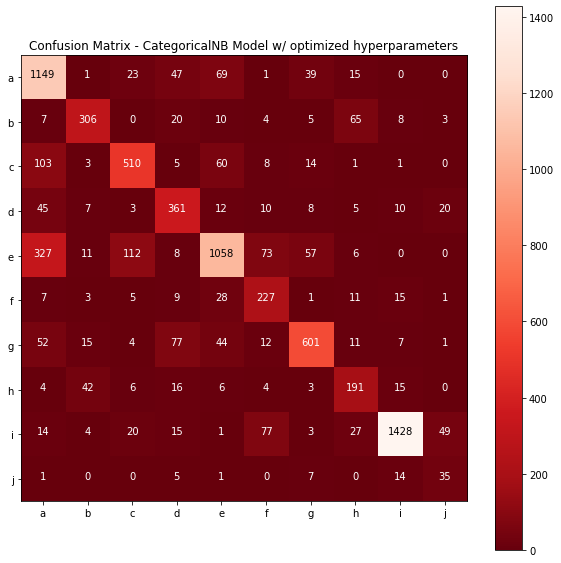

CategoricalNB Classification Report w/ optimized hyperparameters
              precision    recall  f1-score   support

           a       0.67      0.85      0.75      1344
           b       0.78      0.71      0.75       428
           c       0.75      0.72      0.73       705
           d       0.64      0.75      0.69       481
           e       0.82      0.64      0.72      1652
           f       0.55      0.74      0.63       307
           g       0.81      0.73      0.77       824
           h       0.58      0.67      0.62       287
           i       0.95      0.87      0.91      1638
           j       0.32      0.56      0.41        63

    accuracy                           0.76      7729
   macro avg       0.69      0.72      0.70      7729
weighted avg       0.78      0.76      0.76      7729



In [ ]:

#Re train with hyper parameters

features = ocr_train[train_features]
target = ocr_train[train_target]

features_test = ocr_test[test_features]
target_test=ocr_test[test_target]

#alpha = 0.1
canb = CategoricalNB(alpha=0.1, fit_prior=True)
canb.fit(features, target)

prediction = canb.predict(features_test)


#confusion matrix
t_features=ocr_test[test_features]
t_target = ocr_test[test_target]
t_target = t_target.to_numpy()


cMatrix = confusion_matrix(t_target, prediction, labels=range(10))


#Functions creating iterators for efficient looping - itertools
classes = ['a','b','c','d','e','f','g','h','i','j']

plt.figure(figsize=(10,10))

plt.imshow(cMatrix, interpolation='nearest', cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix - CategoricalNB Model w/ optimized hyperparameters')
plt.colorbar()
plt.xticks(range(10),classes)
plt.yticks(range(10),classes)

for k,v in itertools.product(range(cMatrix.shape[0]),range(cMatrix.shape[1])):
  plt.text(v, k, cMatrix[k,v],horizontalalignment="center",color="black" if cMatrix[k,v]>800 else "white")

plt.show()

#New scores
y_true = np.array(t_target)
y_pred = np.array(prediction)

print("CategoricalNB Classification Report w/ optimized hyperparameters")
print(classification_report(y_true, y_pred, target_names=classes))

ROC New

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now missing:
- 0.108
- 0.109
- 0.110

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.17
- 1.18
- 1.19
Feature names seen at fit time, yet now mis

Text(0.5, 0, 'False Positive Rate')

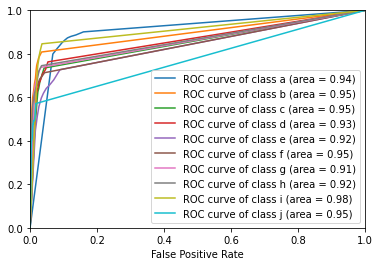

In [ ]:


lw = 2
plt.figure()


#range represents classes a-j
for rocClass in range(10):
  predict_prob = mnm.predict_proba(features_test)
  prob_possibility = predict_prob[:, rocClass]
  thresholds = np.arange(0.0, 1.2, 0.1) #just as range gives a range of numbers and its skip patter so does numpy arange
  true_pos, false_pos = [0] * len(thresholds), [0] * len(thresholds)
  for pred, y in zip(prob_possibility, target_test):
    for i, threshold in enumerate(thresholds):
      if pred >= threshold:
        if y == rocClass:
          true_pos[i] += 1
        else:
          false_pos[i] += 1
      else:
        break
  true_pos_rate = [tp/len(np.where(target_test == rocClass)[0]) for tp in true_pos]
  false_pos_rate = [fp/len(np.where(target_test != rocClass)[0]) for fp in false_pos]
  roc_score = roc_auc_score(target_test == rocClass, prob_possibility, max_fpr=1)
  plt.plot(false_pos_rate, true_pos_rate, label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[rocClass], roc_score))
  plt.legend(loc="lower right")
  plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')


In conclusion, as a comparrison, the models f1-score performance is as follows:
1. **CategoricalNB**
2. **MultiNominalNB**
3. **ComplimentaryNB**

By combining a new classifier that's suitable for classification with discrete features, together with optimized hyperparameters we were able to achieve a result higher than the example given. We have reached our goal and have successfully raised the score of every classification including the lowest classification 'j'. 